## Unsupervised Learning

In this exercise session, we will study some of the most popular methods used in unsupervised learning

### 1. Principal component analysis 

In this first exercise, we will start by applying principal component analysis for data compression and/or simply to find the direction of greatest variation in a dataset.

__1.1. Face compression and recovery.__ As a warm up, use the lines below to load and store the olivetti face dataset. Then, use the methods from the _PCA class_ to learn the average face (first component) as well as the representations of the largest variations in the dataset (subsequent components).


To get the representing faces, you will have to use three functions from the class (on top of the initialization of the model through PCA)

    
 - The function _fit_ is used to initialize the PCA model with the data (i.e your face dataset)
 - The function _fit_transform_ is used to transform a given (set of) image(s) (using the transform that was learned in the call to _fit_) into the lower dimensional/compressed domain.
 - Finally, the function _inverse_transform_ is used to recover the image from its compressed representation.
 
 As an example, consider a set of $N$ images ${I_k}_{k=1}^N$. If you learn a PCA model with 2 component, this model will look for an optimal representation of the set in terms of only two images, $c_1$ and $c_2$. In particular, it  means that _fit_ will learn the two best images $c_1$ and $c_2$ such that the difference $a_1c_1 - a_2c_2 - I_k$ is as small as possible for the set of images $I_k$, $k=1,..., N$. 
 
When applying the function _fit_transform_ to a specific image $I_k$, you precisely ask the model to return the coefficients $a_1$ and $a_2$ such that the decomposition $a_1c_1 + a_2c_2$ is the best approximation to $I_k$. The pair $(a_1,a_2)$ hence represents a compression of the image $I_k$, from which this image cn be recovered through the function _inverse_transform_. In other words, we have the chain

$I_k$ --> _'fit transform'_ --> $(a_1,a_2)$ --> _'inverse transform'_ --> $a_1c_1 + a_2c_2$

Use this idea on the Olivetti face dataset. Vary the number of components. 


 - How many components, do you need to recover a meaningful image?
 - What does the first few components look like? What do they represent according to you?


(400, 4096)


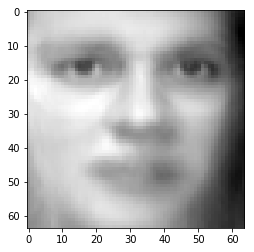

In [22]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



faces = fetch_olivetti_faces()
pca = PCA(n_components=5)
pca.fit(faces.data)
print(faces.data.shape)

faces_trans = pca.fit_transform(faces.data)

faces_invtrans = pca.inverse_transform(faces_trans)


image1 = faces_invtrans[1,:].reshape((64,64))

fig, ax = plt.subplots()
ax.imshow(image1, cmap='gray') 

plt.show()


__1.2 Gaining more intuition : a simpler two sources dataset__

In this second exercise, to gain some intuition, we will consider a dataset generated from two sources and compare the vectors returned by principal component analysis and independent component analysis. Consider the points cloud given below. On the transformed dataset, apply respectively a

 - PCA Analaysis with 2 components
 - ICA Analysis with 2 components
 
 Compare the results.


(20000, 2)


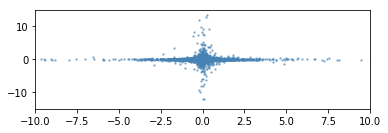

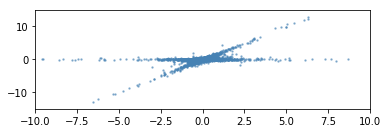

In [27]:
import numpy as np
import pylab as pl

from sklearn.decomposition import PCA, FastICA

###############################################################################
# Generate sample data
rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

print(S.shape)

plt.subplot(211)
plt.scatter(S[:,0]/np.std(S),S[:,1]/np.std(S), s=2, marker='o',color='steelblue', alpha=0.5)
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([-15,15])
plt.show()


# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations


plt.subplot(212)
plt.scatter(X[:,0]/np.std(X),X[:,1]/np.std(X), s=2, marker='o',color='steelblue', alpha=0.5)
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([-15,15])
plt.show()





In [ ]:
# put your code here



### 2. Independent component Analysis

In this exercise, we will use another approach to dimensionality reduction, known as independent component analysis (ICA). ICA is particularly useful in speech or more generally, source separation. In the classic version of this problem, known as _coktail party problem_, one is interested in recovering two distinct signals from a mix of them. Using the FastICA transform, recover the two speeches from the _mixed1.wav_ and _mixed1.wav_ files which are given on github.

(156239,)
(156239,)
(156239, 2)


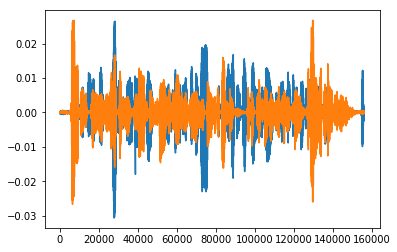

In [71]:
import numpy as np                                                             
import soundfile as sf                                                      
from sklearn.decomposition import FastICA, PCA
import matplotlib.pyplot as plt
from scipy.io.wavfile import write


mixed1, sample1 = sf.read("mixed1.wav")
mixed2, sample2 = sf.read("mixed2.wav")
print(mixed1.shape)
print(mixed2.shape)

mix = np.zeros((156239,2))
mix[:,0] = mixed1
mix[:,1] = mixed2

mixed1 = mixed1.reshape(-1,1)

transformer = FastICA(n_components=2, random_state=0)
transformed = transformer.fit_transform(mix)
print(transformed.shape)

recovered1 = np.int16(transformed[:,0]/np.max(np.abs(transformed[:,0]))*32767)
write('recovered1.wav',sample1,recovered1)

recovered2 = np.int16(transformed[:,1]/np.max(np.abs(transformed[:,1]))*32767)
write('recovered2.wav',sample2,recovered2)



#transformed2 = transformer.fit_transform(mixed2)
#print(transformed2.shape)

#recovered2 = np.int16(transformed2[:,0]/np.max(np.abs(transformed2[:,0]))*32767)
#write('recovered2.wav',sample2,recovered2)


#pca = PCA(n_components=1)
#transformed2 = pca.fit_transform(mixed1)
#print(transformed2.shape)



x = np.zeros((transformed1.shape))
for i in range(156239):
    x[i] = i

plt.plot(x,transformed1)
#plt.plot(x,transformed2)



### 3. Manifold learning 

In this exercise, we will get familiar with the most popular manifold learning methods (see http://www.augustincosse.com/wp-content/uploads/2018/11/slides10.pdf for a review of the theory) 

__3.1. Getting some intuition: the moving ball__ Consider the sequence of frames defined below. Those frames are encoded as columns of the data matrix. Use the MDS and then ISOMAP algorithms to get an intuition on the trajectory followed by the white ball.

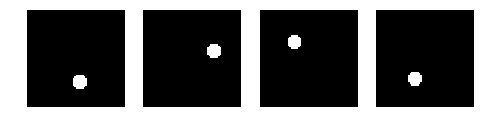

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

radius = 15

radius2 = 5


theta = np.linspace(0, 2*np.pi, num=50)


simple_movie = np.zeros((64,64,50))


for k in range(0,50):

        
    xpos = np.rint(32 + radius*np.cos(theta[k]))
    ypos = np.rint(32 + radius*np.sin(theta[k]))
    
    for i in range(0,simple_movie.shape[0]):
        for j in range(0,simple_movie.shape[1]):
    
            if (i-xpos)**2 + (j-ypos)**2 < radius2**2:
        
                simple_movie[i,j,k] = 1

plt.figure(1, figsize=(8, 3))
plt.subplot(141)  
plt.imshow(simple_movie[:,:,1],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)  
plt.imshow(simple_movie[:,:,15],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(143)  
plt.imshow(simple_movie[:,:,30],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(144)  
plt.imshow(simple_movie[:,:,45],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.show()

x = np.zeros((64,64))



mds = MDS()
iso = Isomap()
#mds.fit_transform(simple_movie,simple_movie[])


In [5]:
import numpy as np

data = np.zeros((simple_movie.shape[0]*simple_movie.shape[1],simple_movie.shape[2]))

for k in range(0,50):
    
    tmp = np.zeros((simple_movie.shape[0],simple_movie.shape[1]))
    tmp = simple_movie[:,:,k].T 
    
    data[:,k] = tmp.reshape((simple_movie.shape[0]*simple_movie.shape[1],1)).ravel()

    

In [ ]:
from sklearn import manifold, datasets

# put your code here


